# Importing the Dependancies

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score

import pickle

# Data Collection & Processing 

In [23]:
#  loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('E:\Data Science\Data Science Projects\Car Price Prediction\car data.csv')

In [24]:
# inspecting First 5 rowa of the of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# checking the rows and coloumn 
car_dataset.shape

(301, 9)

In [26]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
# checking the number of missing values (if missing values is there hen need to do imputation)
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [29]:
# Encoding "Fuel_Type" coloumn
car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}},inplace = True)

# Encoding "Seller_Type" coloumn
car_dataset.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}},inplace = True)

# Encoding "Transmission" coloumn
car_dataset.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}},inplace = True)


In [30]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Spliting The Data & Target

In [31]:
x = car_dataset.drop(['Car_Name', 'Selling_Price'],axis=1) 
y = car_dataset['Selling_Price']

In [32]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [33]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Spliting Training Data and Test Data

In [34]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.1, random_state = 2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(270, 7)
(31, 7)
(270,)
(31,)



# Model Training

### 1. Linear Regression 

In [36]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [37]:
lin_reg_model.fit(X_train, Y_train)

Y_pred = lin_reg_model.predict(X_test)

r2_score(Y_test, Y_pred)

# linearRegression = LinearRegression()
# linearRegression.fit(X_train, y_train)
# y_pred = linearRegression.predict(X_test)
# r2_score(y_test, y_pred)


0.8365766715026903

### Model Evaluation

In [38]:
# predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [39]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8799451660493698


## Visualize the Actual Prices & Predicted Prices

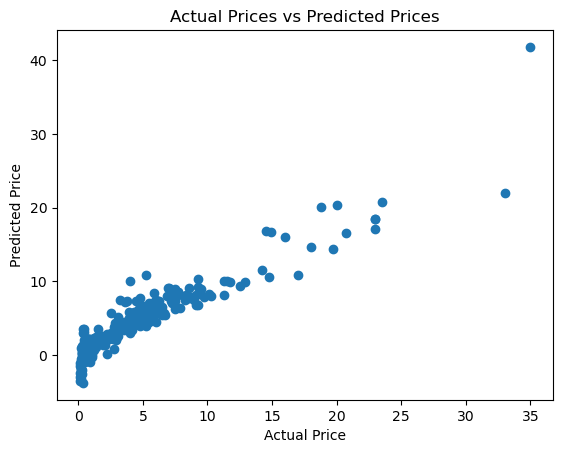

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [40]:
# predicting on training data
test_data_prediction = lin_reg_model.predict(X_test)
# test_data_prediction = lin_reg_model.predict([[0,2014,5.59,27000,0 , 0  ,0] ]  )

In [41]:
# input_data = (0,2014,5.59,27000,0,0,0)
# # changing the input_data into numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the  np array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# prediction = model.predict(input_data_reshaped)
# print(prediction)

In [42]:
test_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [43]:
# R Squared Error
error_score = metrics.r2_score(Y_test  , test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8365766715026903


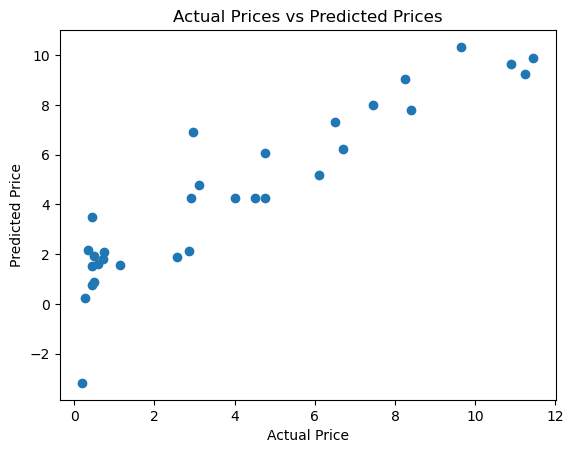

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Lasso Regression 

In [ ]:
# input_data = (
# 0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115)
# # changing the input_data into numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshPE the  np array as we are predicting for one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# prediction = model.predict(input_data_reshaped)
# print(prediction

In [ ]:
# Saving Model using Pickle
pickle.dump(lin_reg_model, open('model.pkl', 'wb'))

In [ ]:
# Loading Model using Pickle 
model = pickle.load(open('model.pkl', 'rb'))
pred_value = model.predict(pd.DataFrame([[2014,5.59,27000,0,0,0,0]], columns=["Year","Present_Price",
                                                                  "Kms_Driven","Fuel_Type","Seller_Type",
                                                                  "Transmission","Owner"]))
#
print(f"Rs. {np.round(pred_value[0], 2)}")

In [ ]:
car_dataset.head(5)